# Programación para Analítica de Datos

### Ejemplo de procesamiento de imágenes y uso de arreglos en Numpy

### Mtra. Gisel Hernández chávez

Ejemplo tomado de https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

## Biblioteca Pillow (PIL)

https://pillow.readthedocs.io/en/stable/

Esta biblioteca de Python agrega capacidades de procesamiento de imágenes a su intérprete.

Proporciona una amplia compatibilidad con formatos de archivos de imágenes, una representación interna eficiente y capacidades de procesamiento de imágenes bastante potentes.

Está diseñada para un acceso rápido a los datos almacenados en unos pocos formatos de píxeles básicos. Proporciona una base sólida para una herramienta general de procesamiento de imágenes.

In [1]:
import numpy as np

import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 8.0.0


In [2]:
import os

# Obtener directorio de trabajo
path = os.getcwd()
path

'C:\\Users\\ghernand\\Documents\\ProgramacionAnaliticaDatos'

In [3]:
#dir(str)

In [4]:
#str.replace?

In [5]:
pil_dir = PIL.__file__.strip('__init__.py')
pil_dir = pil_dir.replace('\\','/')
print(pil_dir)

C:/Users/ghernand/Anaconda3/lib/site-packages/PIL/


In [6]:
# Cargar y mostrar la imagen
from PIL import Image

# Abrir la imagen en el directorio de trabajo

load_image = Image.open(path + '\\koalita.jpg')
# Detalles de la imagen
print(load_image.format)
print(load_image.size)
print(load_image.mode)
# show the image
load_image.show()  # Lo muestra en la aplicación de visor de imágenes por defecto, en lugar de mostrarlo en el notebook

JPEG
(800, 450)
RGB


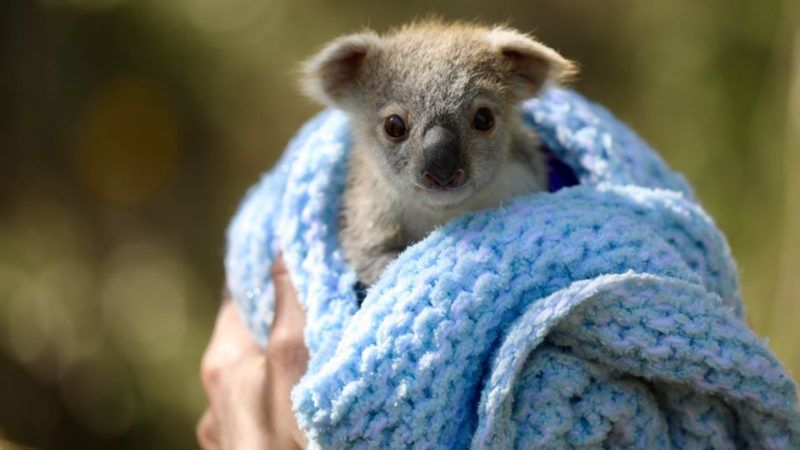

In [7]:
# Usamos el alias ima para no confundirlo con Image de PIL

from IPython.display import Image as ima

# Muestra la imagen en el notebook
ima(filename = path + '\\koalita.jpg', width=1000, height=1000)

## Cargar y mostrar imagen con Matplotlib

uint8
(450, 800, 3)


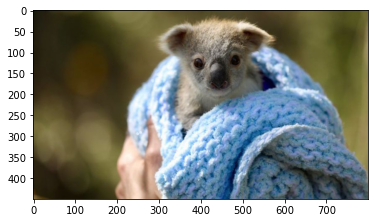

In [8]:
# Cargar y mostrar imagen con Matplotlib

import matplotlib.pyplot as plt
from matplotlib import image

# Cargar imagen como arreglo de pixeles
imagen = image.imread(path + '\\koalita.jpg')
# Tipo y forma del arreglo
print(imagen.dtype)
print(imagen.shape)
# display the array of pixels as an image
plt.imshow(imagen)
plt.show()

## Convertir imagen a numpy array

NumPy usa la clase asarray() para convertir imágenes PIL en matrices NumPy. La función np.array también produce el mismo resultado. La función de tipo muestra la clase de una imagen.

El proceso se puede revertir usando la función Image.fromarray(). Esta función es útil cuando la manipulación se realiza en datos de imagen numpy.ndarray, que luego queremos guardar como un archivo PNG o JPEG.

In [9]:
# Convertir imagen a numpy array
data = np.asarray(imagen)
print(type(data))


<class 'numpy.ndarray'>


In [10]:
data

array([[[ 25,  26,  12],
        [ 25,  26,  12],
        [ 25,  26,  12],
        ...,
        [113, 106,  52],
        [113, 106,  52],
        [114, 107,  53]],

       [[ 25,  26,  12],
        [ 25,  26,  12],
        [ 25,  26,  12],
        ...,
        [113, 106,  52],
        [113, 106,  52],
        [114, 107,  53]],

       [[ 25,  26,  12],
        [ 25,  26,  12],
        [ 25,  26,  12],
        ...,
        [112, 105,  51],
        [113, 106,  52],
        [113, 106,  52]],

       ...,

       [[137, 119,  69],
        [134, 116,  66],
        [128, 110,  62],
        ...,
        [ 67,  91,  91],
        [ 66,  90,  90],
        [ 66,  87,  88]],

       [[151, 127,  81],
        [144, 120,  74],
        [135, 111,  67],
        ...,
        [ 74,  93,  91],
        [ 70,  89,  85],
        [ 66,  85,  81]],

       [[151, 127,  81],
        [144, 120,  74],
        [135, 111,  67],
        ...,
        [ 74,  93,  91],
        [ 70,  89,  85],
        [ 66,  85,  81]]

In [11]:
# Forma del array de dimensión 3
print(data.shape)

(450, 800, 3)


In [12]:
# Crear imagen de Pillow 
image2 = Image.fromarray(data) # De array lo pasa a imagen
print(type(image2))

<class 'PIL.Image.Image'>


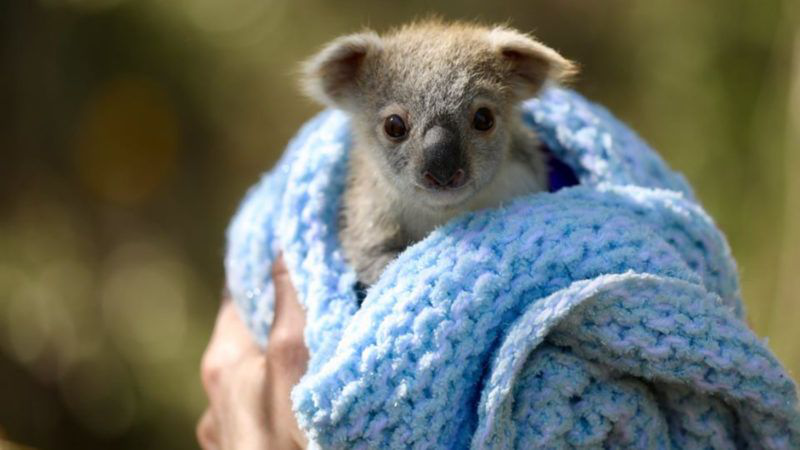

In [13]:
image2  # Se visualiza directamente en el notebook

In [14]:
# Detalles de la imagen: modo y tamaño
print(image2.mode)
print(image2.size)

RGB
(800, 450)


## Convertir imagen a escala de grises

convert() retorna una imagen convertida. Al traducir una imagen en color a escala de grises (modo "L"),
la biblioteca utiliza la transformada luma ITU-R 601-2:

    L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [15]:
#load_image.convert?

In [16]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
im_gris = Image.open(path + '\\koalita.jpg').convert('L')
im = np.array(im_gris) 
print(type(im))


<class 'numpy.ndarray'>


In [18]:
Image.fromarray(im).save(path + '\\gr_koalita.png')

In [19]:
im  # Note que como no tiene color el array es de dimensión 2

array([[ 24,  24,  24, ..., 102, 102, 103],
       [ 24,  24,  24, ..., 102, 102, 103],
       [ 24,  24,  24, ..., 101, 102, 102],
       ...,
       [119, 116, 110, ...,  84,  83,  81],
       [129, 122, 113, ...,  87,  83,  79],
       [129, 122, 113, ...,  87,  83,  79]], dtype=uint8)

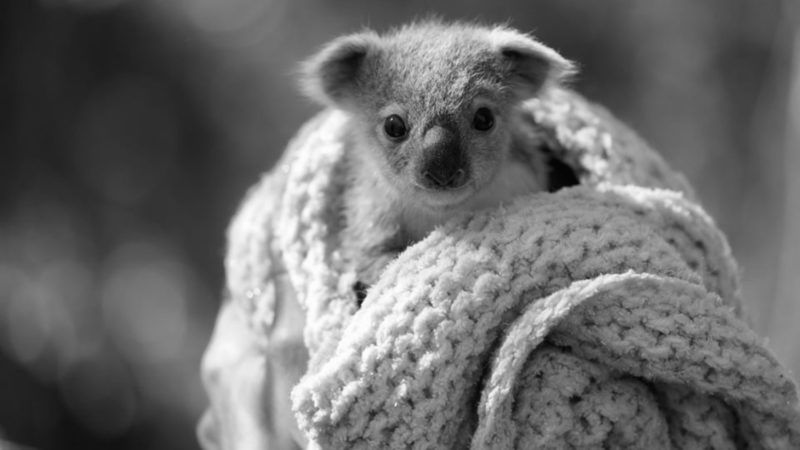

In [20]:
# Mostrar la imagen con función de IPython.display

ima(filename = path + '\\gr_koalita.png', width=1000, height=1000)

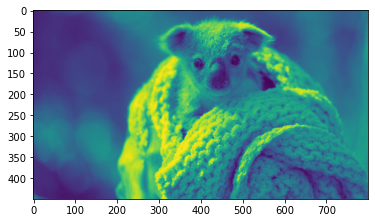

In [21]:
# Note que no se observa la imagen gris porque asume que le están pasando una imagen de color
plt.imshow(im_gris)
plt.show()

In [22]:
plt.imshow?

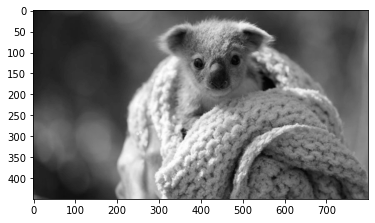

In [23]:
# Ahora sí la vemos en tonos grises
plt.imshow(Image.open(path + '\\gr_koalita.png'),cmap='gray')
plt.show()

## Cambiar tamaño de la imagen

In [24]:
load_img_rz = np.array(load_image.resize((200,200)))
Image.fromarray(load_img_rz).save(path+'\\r_koalita.jpeg')
print("Después del cambio:",load_img_rz.shape)

Después del cambio: (200, 200, 3)


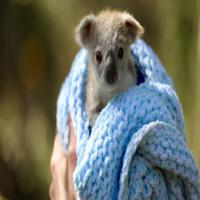

In [26]:
ima(filename = path + '\\r_koalita.jpeg', width=500, height=500)

## Recortar la imagen (trimming)

In [25]:
im = np.array(Image.open(path+'\\koalita.jpg'))

print("Antes del recorte:",im.shape)

im_trim = im[128:384, 128:384]
print("Después del recorte:",im_trim.shape)

Image.fromarray(im_trim).save(path+'\\trim_koalita.jpeg')

Antes del recorte: (450, 800, 3)
Después del recorte: (256, 256, 3)


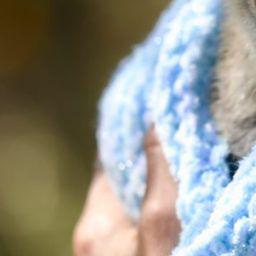

In [27]:

ima(filename = path + '\\trim_koalita.jpeg', width=500, height=500)

## Modificar la imagen directamente usando arreglos de numpy

Vamos a usar otra imagen para que se note el cambio de color

In [101]:
planetas = image.imread(path + '\\planetas_rojos.jpg')
#planetas = image.imread(path + '\\japan_flag.jpg')
arr_planet = np.array(planetas)

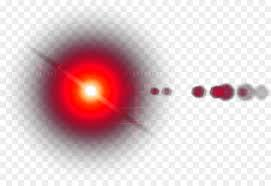

In [102]:
#ima(filename = path + '\\planetas_rojos.jpg', width=500, height=500)
ima(filename = path + '\\planetas_rojos.jpg', width=500, height=500)

In [103]:
# Vamos a usar la variable load_image que contiene la imagen original del koalita y arr_planet que contiene el array

#r1, g1, b1 = 255, 255, 255 # Valor original blanco en RGB (red, green, blue) 
r1, g1, b1 = 255, 255, 255 # Valor original rojo en RGB (red, green, blue) 
# ver https://www.google.com/search?q=rgb+for+white&rlz=1C1GCEU_esMX866MX866&oq=rgb+for+white&aqs=chrome..69i57j0i512l2j0i22i30l7.17792j0j7&sourceid=chrome&ie=UTF-8 
r2, g2, b2 = 0,0,255 # Valores con los que queremos reemplazar el original (azul)

# La columna 0 tiene valores para R, la columna 1 para G y la 2 para B

red, green, blue = arr_planet[:,:,0], arr_planet[:,:,1], arr_planet[:,:,2]  # tupla de arreglos. cada elemento de tupla para un color
red, green, blue

(array([[251, 252, 253, ..., 255, 254, 253],
        [252, 254, 255, ..., 255, 254, 253],
        [253, 255, 255, ..., 255, 254, 254],
        ...,
        [249, 248, 249, ..., 255, 255, 255],
        [255, 250, 255, ..., 255, 255, 254],
        [255, 250, 255, ..., 255, 255, 254]], dtype=uint8),
 array([[251, 252, 253, ..., 255, 254, 253],
        [252, 254, 255, ..., 255, 254, 253],
        [253, 255, 255, ..., 255, 254, 254],
        ...,
        [249, 248, 249, ..., 255, 255, 255],
        [255, 250, 255, ..., 255, 255, 254],
        [255, 250, 255, ..., 255, 255, 254]], dtype=uint8),
 array([[251, 252, 253, ..., 255, 254, 253],
        [252, 254, 255, ..., 255, 254, 253],
        [253, 255, 255, ..., 255, 254, 254],
        ...,
        [249, 248, 249, ..., 255, 255, 255],
        [255, 250, 255, ..., 255, 255, 254],
        [255, 250, 255, ..., 255, 255, 254]], dtype=uint8))

In [104]:
# Creación de una máscara: arreglo bidimensional de booleanos en el que el elemento será True si 
# los correspondientes elementos de la tupla son 0
mask = (red == r1) & (green == g1) & (blue == b1)
mask

array([[False, False, False, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True, False],
       [ True, False,  True, ...,  True,  True, False]])

In [105]:
mask.shape

(186, 271)

In [106]:
arr_planet[:,:,:3] # Todos los elementos de la primera y segunta dimensión, pero solo los elementos de posición 0,1 y 2 de la tercera dimensión

array([[[251, 251, 251],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [253, 253, 253]],

       [[252, 252, 252],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [253, 253, 253]],

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[249, 249, 249],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]]

In [107]:
arr_planet[:,:,:3][mask] 

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [108]:
# Se hace el cambio
arr_planet[:,:,:3][mask] = [r2, g2, b2]


In [109]:
arr_planet.flags
'''En particular, el indicador OWNDATA si se establece en False 
(lo que significa que el arreglo toma prestada la memoria de otro objeto),
así como si el indicador WRITEABLE es False (no puede cambiar el objeto)

La solución es crear una copia del objeto
'''

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

'En particular, el indicador OWNDATA si se establece en False \n(lo que significa que el arreglo toma prestada la memoria de otro objeto),\nasí como si el indicador WRITEABLE es False (no puede cambiar el objeto)\n\nLa solución es crear una copia del objeto\n'

In [110]:
data_copia =arr_planet.copy()
data_copia[:,:,:3][mask] = [r2, g2, b2]

In [111]:
Image.fromarray(data_copia).save(path + '\\mask_planet.png')

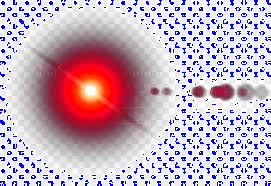

In [113]:
# Muestra que cambió los pixeles blancos por azules
ima(filename = path + '\\mask_planet.png', width=500, height=500)

# Hasta aquí el desarrollo del caso

In [ ]:
a = np.array([[1,2,3,4,5],[1,2,3,4,5]])
a

In [ ]:
a.shape

In [ ]:
mascara = np.array([[True,False],[True,True]])
mascara2 = np.array([[True,True],[True,True]])

In [ ]:
cambio = 10,10,10

In [ ]:
a[:,:2]

In [ ]:
a[:,:2][mascara] 


In [ ]:
a[:,:2][mascara2] 

In [ ]:
a[:,:2][mascara] = cambio
a

In [ ]:
[]

In [ ]:
im = Image.fromarray(data)
im.save('fig1_modified.png')

In [ ]:
# Modificar la imagen y mostrarla
import numpy as np
data2 = data * np.array([3,3,3])

In [ ]:
data2

In [ ]:
data2.shape